# GONZAG WestMed example

This notebook demonstrates how Gonzag can be used to:
- perform a space-time interpolation of SSH on a gridded OGCM domain onto a satellite track (provided in 2 NetCDF input files)
- select and retain N valid SSH along track segments (both for input satellite SSH and interpolated model SSH)
- preprocess these N SSH segments prior to applying a Fast Fourrier Transform (FFT)
- apply the FFT
- plot the the mean spectrum (of the N spectra)

## Loading & initializations

In [1]:
import sys
import os
from os import getenv
import warnings
warnings.filterwarnings("ignore")

GONZAG_DIR   = '/Users/auraoupa/Work/git/gonzag_cloud'
sys.path.append(GONZAG_DIR)

import gonzag as gz

GONZAG_DATA_DIR = '/Users/auraoupa/Data/gonzag/gonzag_input'

# Satellite input data:
name_sat = 'Sentinel3A'
file_sat = GONZAG_DATA_DIR+'/SENTINEL3A_20170130-20170303.nc'
name_ssh_sat = 'sla_unfiltered'
name_time_sat='time'
period_sat=['2017-02-01','2017-02-28'] #period of satellite is bigger than model so we restrict to model period

# Model input data:
name_mod = 'eNATL60-WestMed'
file_mod = GONZAG_DATA_DIR+'/sossheig_box_WestMed_eNATL60-BLBT02_20170201-20170228.nc'
name_ssh_mod = 'sossheig'
name_lat_mod = 'gphit'
name_lon_mod = 'glamt'
name_time_mod = 'time_counter'
file_lsm_mod = file_mod; name_lsm_mod = '_FillValue' ; # we use _FillValue attribute of "nams_ssh_mod" in "file_mod"
clsm = name_lsm_mod
if name_lsm_mod=='_FillValue': clsm = name_lsm_mod+'@'+name_ssh_mod

period_mod=['2017-02-01','2017-02-28']
l_griddist = False ; # grid is not strongly distorded





In [2]:
!ls $file_mod

/Users/auraoupa/Data/gonzag/gonzag_input/sossheig_box_WestMed_eNATL60-BLBT02_20170201-20170228.nc


In [3]:
import xarray as xr
dsmod=xr.open_dataset(file_mod)
dssat=xr.open_dataset(file_sat)

In [4]:
dsmod

<xarray.Dataset>
Dimensions:       (y: 796, x: 868, time_counter: 672)
Coordinates:
    glamt         (y, x) float64 ...
    gphit         (y, x) float64 ...
  * time_counter  (time_counter) datetime64[ns] 2017-02-01T00:30:00 ... 2017-...
Dimensions without coordinates: y, x
Data variables:
    sossheig      (time_counter, y, x) float32 ...
Attributes:
    About:    Created with SOSIE interpolation environement => https://github...
    history:  Wed Mar 31 10:18:30 2021: ncks -4 -L 7 --cnk_dmn x,868 --cnk_dm...
    NCO:      netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, C...

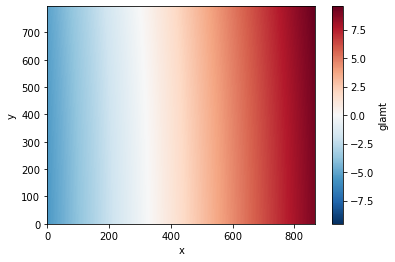

In [5]:
dsmod.glamt.plot()

In [6]:
dssat

<xarray.Dataset>
Dimensions:         (time: 1599082)
Coordinates:
  * time            (time) datetime64[ns] 2017-01-29T23:44:39.027517696 ... 2...
    longitude       (time) float64 ...
    latitude        (time) float64 ...
Data variables:
    cycle           (time) int16 ...
    track           (time) int16 ...
    sla_unfiltered  (time) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_end:               2017-01-30T23:06:37Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2017-01-29T23:44:39Z
    title:                           DT Sentinel-3A Global Ocean Along track ...
    NCO:                             netCDF Operators version 4.9.1 (Homepage...
    history:                         Fri Apr  2 12:02:02 2021: ncwa -O -a rec...

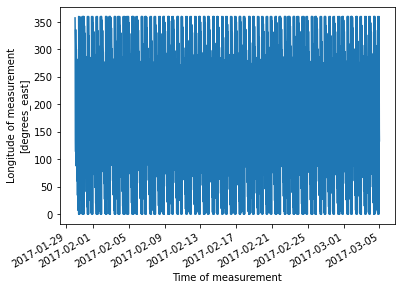

In [7]:
dssat.longitude.plot()

## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [8]:
ModelGrid = gz.ModGrid( dsmod, period_mod, name_lon_mod, name_lat_mod , name_time_mod, dsmod, clsm, distorded_grid=False )



 *** what we use to define model land-sea mask:
    => "_FillValue@sossheig" in dataset 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (796, 868)
     * horizontal resolution:  0.016753984549605475  degrees or  1.8615352233066644  km
     * Is this a global domain w.r.t longitude:  True
       ==> East West periodicity:  False , with an overlap of  -1  points
     * lon_min, lon_max =  0.0 360.0
     * lat_min, lat_max =  35.08 44.43
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  648
       ==> time record dates: 2017-02-01 to 2017-02-28, included



In [9]:
ModelGrid.domain_bounds

[35.07984924316406, 0.0, 44.427764892578125, 360.0]

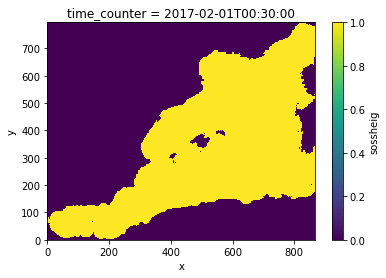

In [10]:
ModelGrid.mask.plot()

In [23]:
import numpy as nmp
import numpy as nmp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline


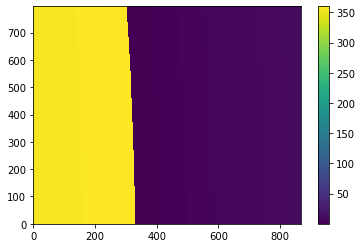

In [26]:
plt.pcolormesh(X)
plt.colorbar()

In [31]:
X

<xarray.DataArray 'glamt' (y: 796, x: 868)>
array([[354.50157213, 354.51827145, 354.53497124, ...,   8.94081402,
          8.95749855,   8.97418308],
       [354.50176668, 354.51846647, 354.53516626, ...,   8.94109058,
          8.95777607,   8.9744606 ],
       [354.50196171, 354.5186615 , 354.53536129, ...,   8.94136906,
          8.95805359,   8.97473907],
       ...,
       [354.89524221, 354.91218853, 354.92913389, ...,   9.49198914,
          9.50878239,   9.52557659],
       [354.89613533, 354.91308165, 354.93002796, ...,   9.49322701,
          9.51002121,   9.52681541],
       [354.8970294 , 354.91397619, 354.93092299, ...,   9.49446678,
          9.51126099,   9.52805519]])
Coordinates:
    glamt    (y, x) float64 ...
    gphit    (y, x) float64 ...
Dimensions without coordinates: y, x
Attributes:
    cell_methods:  t: mean
    valid_min:     -5.498427867889404
    valid_max:     9.528055191040039

In [32]:
    imin = nmp.argmin(X.values)

In [37]:
    X=ModelGrid.lon
    mask=ModelGrid.mask
    from gonzag.utils import *
    nx   = X.shape[1]
    X    = nmp.mod(X, 360.) ; # no concern, it should already have been done earlier anyway...
    Xm   = nmp.ma.masked_where( mask==0, X    )
    xmin = nmp.amin(X.values) ; # in [0:360] frame...
    xmax = nmp.amax(X.values) ; #     "     "
    imin = nmp.argmin(X.values)%nx
    imax = nmp.argmax(X.values)%nx
    #
    xb = degE_to_degWE(X.values)
    xminB = nmp.amin(xb) ; # in [-180:+180] frame...
    xmaxB = nmp.amax(xb) ; #     "      "


In [38]:
print(xminB,xmaxB,imin,imax)

-5.498427867889404 9.528055191040039 327 321


In [ ]:
print(xminB.values,xmaxB.values)

## Create object `SatelliteTrack` containing all the satellite track (aka _target_) info

In [ ]:
SatelliteTrack = gz.SatTrack( dssat, period_sat, name_time_sat, name_ssh_sat, domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

## Build the bilinear mapping & Perform the space-time interpolation

In [ ]:
if not os.path.exists('../results/results_'+name_sat+'-'+name_mod):
        os.makedirs('../results/results_'+name_sat+'-'+name_mod)

In [ ]:
def process_one_track(track):
    tt = "{:02d}".format(track)
    Solution0 = gz.Model2SatTrack( ModelGrid, name_ssh_mod, SatelliteTrack, name_ssh_sat, track )
    c1     = 'Model SSH interpolated in space (' ; c2=') and time on satellite track'
    vvar   = [ 'latitude', 'longitude', name_ssh_mod+'_np'   , name_ssh_mod+'_bl' , name_ssh_sat          , 'distance'                            ]
    vunits = [ 'deg.N'   , 'deg.E'    ,          'm'         ,     'm'            ,    'm'                ,    'km'                               ]
    vlongN = [ 'Latitude', 'Longitude', c1+'nearest-point'+c2,  c1+'bilinear'+c2  , 'Input satellite data', 'Cumulated distance from first point' ]
    from gonzag.config import rmissval
    iw = gz.io.SaveTimeSeries( Solution0.time, \
                             nmp.array( [Solution0.lat, Solution0.lon, Solution0.ssh_mod_np,
                                         Solution0.ssh_mod, Solution0.ssh_sat, Solution0.distance] ), \
                             vvar, '../results/results_'+name_sat+'-'+name_mod+'/result_'+str(tt)+'.nc', time_units='',\
                             vunits=vunits, vlnm=vlongN, missing_val=rmissval )
    return Solution0


In [ ]:
track=0
tt = "{:02d}".format(track)
MG=ModelGrid
ST=SatelliteTrack
one_track=track


In [ ]:
import time ; # to report execution speed of certain parts of the code...
import pandas as pd
import numpy as np
from gonzag.config import ldebug, ivrb, nb_talk, l_plot_meshes, deg2km, rfactor, search_box_w_km, l_save_track_on_model_grid, l_plot_meshes, rmissval
from gonzag.utils  import *
from gonzag.bilin_mapping import BilinTrack


In [ ]:
        from gonzag.io   import GetModel2DVar, GetSatSSH

        jt1=ST.index_tracks[one_track][0]
        jt2=ST.index_tracks[one_track][1]


In [ ]:
print(jt1,jt2)

In [ ]:
        (Nj,Ni) = MG.shape

        d_found_km = rfactor*MG.HResDeg*deg2km
        #print(' *** "found" distance criterion when searching for nearest point on model grid is ', d_found_km, ' km\n')

        # Size of the search zoom box:
        np_box_radius = SearchBoxSize( MG.HResDeg*deg2km, search_box_w_km )
        #print(' *** Will use zoom boxes of width of '+str(2*np_box_radius+1)+' points for 1st attempts of nearest-point location...\n')

        Nt = jt2 - jt1 ; # number of satellit observation point to work with here...

        if_talk = Nt//nb_talk
        startTime = time.time()


In [ ]:
MG.lon.values

In [ ]:
ST.lon[jt1:jt2].values

In [ ]:
BT = BilinTrack( ST.lat[jt1:jt2], ST.lon[jt1:jt2], MG.lat, MG.lon, src_grid_local_angle=MG.xangle, k_ew_per=MG.EWPer, rd_found_km=d_found_km, np_box_r=np_box_radius, freq_talk=if_talk )


In [ ]:
        vssh_m_np = nmp.zeros(Nt) ; vssh_m_np[:] = rmissval; # vector to store the model data interpolated in time and space (nearest-point) on the satellite track...
        vssh_m_bl = nmp.zeros(Nt) ; vssh_m_bl[:] = rmissval; # vector to store the model data interpolated in time and space (bilinear) on the satellite track...
        vdistance = nmp.zeros(Nt)

        # Time increment on the satellite time:
        ktm1   = 0   ; ktm2   = 0
        ktm1_o = -10 ; ktm2_o = -10



In [ ]:
jt=jt1

In [ ]:
            itt = ST.time[jt] ; # unix time
            year_sat=pd.to_datetime(itt).year
            date_model=pd.Series(MG.time)
            date_model_satyear=date_model.apply(lambda dt: dt.replace(year=year_sat))


In [ ]:
print(itt)

In [ ]:
            kt = ktm1
            while not (date_model_satyear[kt]<=itt and date_model_satyear[kt+1]>itt): kt=kt+1
            ktm1 = kt ; ktm2 = kt+1
            

In [ ]:
print(MG.time[kt])

In [ ]:
if (ktm1>ktm1_o) and (ktm2>ktm2_o):
                if (ktm1_o == -10) or (ktm1 > ktm2_o):
                    if ivrb>0: print(' *** Reading '+name_ssh_mod+' in model dataset \n    => at ktm1=', ktm1)
                    Xm1 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm1 )
                else:
                    Xm1[:,:] = Xm2[:,:]
                #
                if ivrb>0: print(' *** Reading '+name_ssh_mod+' in in model dataset \n    => at ktm2=', ktm2)
                Xm2 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm2 )

                # slope only needs to be calculated when Xm2 and Xm1 have been updated:
                Xa = (Xm2 - Xm1) / float((MG.time[ktm2] - MG.time[ktm1] )/ np.timedelta64(1, 's'))


In [ ]:
Xm1.plot()


In [ ]:
Xm2.plot()

In [ ]:
            if ivrb>0 and jt%if_talk==0: print('   => Model data is interpolated at current time out of model records '+str(ktm1)+' & '+str(ktm2))
            Xm = Xm1[:,:] + Xa[:,:]*float((itt - date_model_satyear[ktm1])/ np.timedelta64(1, 's'))

            [ [j1,i1],[j2,i2],[j3,i3],[j4,i4] ] = BT.SM[jt-jt1,:,:]
            [w1, w2, w3, w4]                    = BT.WB[jt-jt1,:]

            Sm = MG.mask[j1,i1] + MG.mask[j2,i2] + MG.mask[j3,i3] + MG.mask[j4,i4]


In [ ]:
BT.SM

In [ ]:
Sm.values